In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
img = cv2.imread("/home/hero576/code/python/lane/data/001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(1296, 2304, 3)

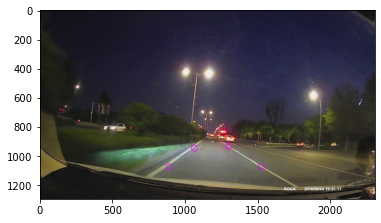

In [27]:
pts_src = np.array([(888, 1075), (1062, 948), (1296, 935), (1523, 1075)], dtype=float)
for p in pts_src:
    p = [int(i) for i in p]
    cv2.circle(img,tuple(p),20,(255,0,255),3)
plt.imshow(img)

In [28]:
img.shape

(1296, 2304, 3)

[[ 921.6 1036.8]
 [ 921.6  518.4]
 [1382.4  518.4]
 [1382.4 1036.8]]
[[-2.66338538e-01 -1.20271589e+00  1.35158807e+03]
 [-9.47301917e-02 -1.38873442e+00  1.37693975e+03]
 [-9.13678504e-05 -1.03426442e-03  1.00000000e+00]]


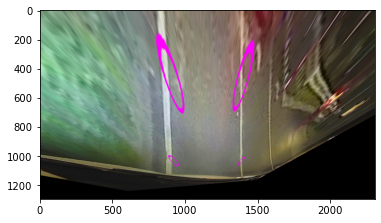

In [29]:
size = img.shape
dst_points = np.array(
    [
        [size[1]*0.4, size[0]*0.8],
        [size[1]*0.4, size[0]*0.4],
        [size[1]*0.6, size[0]*0.4],
        [size[1]*0.6, size[0]*0.8]
    ], dtype=float
)
print(dst_points)
h, status = cv2.findHomography(pts_src, dst_points)
print(h)
ipm_out = cv2.warpPerspective(img, h, size[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(ipm_out)

In [30]:
# a = np.array([1234])
a = np.inf
if a == np.inf:
    print(False)
else:
    print(True)

False


In [31]:
def cvt_point(points,cvt_mat_t):
    u,v = points
    cvt_mat_t = h
    x = (cvt_mat_t[0][0]*u+cvt_mat_t[0][1]*v+cvt_mat_t[0][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    y = (cvt_mat_t[1][0]*u+cvt_mat_t[1][1]*v+cvt_mat_t[1][2])/(cvt_mat_t[2][0]*u+cvt_mat_t[2][1]*v+cvt_mat_t[2][2])
    return x,y

def get_x_intercepts(y_1, y_2, slope, b):
    '''根据斜率和截距，及计算对应y值的x'''
    if not (~np.isnan(slope) and ~np.isnan(b)):
        x_1 = x_2 = 0
    else:
        x_1 = (y_1 - b) / slope
        x_2 = (y_2 - b) / slope
    return x_1, x_2

def get_y_intercepts(lines, slopes):
    '''根据输入线段的斜率，计算对应y方向的截距和平局斜率'''
    slopes = (lines[:, 3] - lines[:, 1]) / (lines[:, 2] - lines[:, 0])
    slopes = slopes[~np.isnan(slopes)]
    slopes = slopes[~np.isinf(slopes)]
    avg_slope = slopes.mean()
    lines = lines.reshape((lines.shape[0] * 2, lines.shape[1] // 2))
    x_mean, y_mean = np.mean(lines, axis=0)
    return y_mean - (x_mean * avg_slope), avg_slope

def get_line_slope(p1,p2):
    if p1[1]==p2[1]:
        return np.inf,p1[1]
    else:
        slope = (p1[1]-p2[1])/(p1[0]-p2[0])
        return slope,p1[1] - slope*p1[0]
def get_x(y,slope,b):
    if slope == np.inf or slope == 0:
        return None
    else:
        return (y-b)/slope

In [32]:
1000/np.inf

0.0

In [33]:
pts_src,dst_points

(array([[ 888., 1075.],
        [1062.,  948.],
        [1296.,  935.],
        [1523., 1075.]]),
 array([[ 921.6, 1036.8],
        [ 921.6,  518.4],
        [1382.4,  518.4],
        [1382.4, 1036.8]]))

In [34]:
for p in pts_src:
    print(cvt_point(p,h))

(921.5999755859365, 1036.8000488281236)
(921.5999755859352, 518.4000244140606)
(1382.4000244140611, 518.4000244140599)
(1382.4000244140605, 1036.8000488281236)


In [35]:
lane_calibrate_width = 3000
lane_calibrate_length = 5000

In [36]:
dst_points

array([[ 921.6, 1036.8],
       [ 921.6,  518.4],
       [1382.4,  518.4],
       [1382.4, 1036.8]])

In [37]:
dx = lane_calibrate_width/(dst_points[np.argmax(dst_points[:,0])][0]-dst_points[np.argmin(dst_points[:,0])][0])
dy = lane_calibrate_length/(dst_points[np.argmax(dst_points[:,1])][1]-dst_points[np.argmin(dst_points[:,1])][1])
dx,dy

(6.510416666666669, 9.645061728395062)

In [38]:
car_front_wheel_distance = 10000
car_rear_wheel_distance = 13000
car_width = 2200

In [39]:
car_front_wheel_pixel = car_front_wheel_distance/dy
car_rear_wheel_pixel = car_rear_wheel_distance/dy
car_width_pixel = car_width/dx

In [40]:
car_front_wheel_pixel,car_rear_wheel_pixel,car_width_pixel

(1036.8, 1347.84, 337.9199999999999)

In [68]:
width = size[1]

car_pos = [
    ((width-car_width_pixel)/2, dst_points[0][1]+car_rear_wheel_pixel), # 左下
    ((width-car_width_pixel)/2, dst_points[0][1]+car_front_wheel_pixel), # 左上
    ((width+car_width_pixel)/2, dst_points[3][1]+car_front_wheel_pixel), # 右上
    ((width+car_width_pixel)/2, dst_points[3][1]+car_rear_wheel_pixel), # 右下
]
car_pos = [(int(x),int(y)) for x,y in car_pos]
car_pos

[(983, 2383), (983, 2072), (1320, 2072), (1320, 2383)]

In [69]:
dst_points = [(int(x),int(y)) for x,y in dst_points]

In [70]:
max_distance = np.max([y for _,y in car_pos ])

In [71]:
img_car_pos = np.zeros((max_distance+50,width,3),dtype=np.int32)

In [72]:
lane_points = []
lanes = [(927, 1036, 1218, 825), (1254, 911, 1446, 1036)]
for lane in lanes:
    p1,p2 = lane[:2],lane[2:]
    lane_points.append(cvt_point(p1,h))
    lane_points.append(cvt_point(p2,h))
lane_points = [(int(x),int(y)) for x,y in lane_points]
lane_points

[(904, 957), (985, 3268), (1374, 123), (1372, 976)]

(1296, 2304, 3)


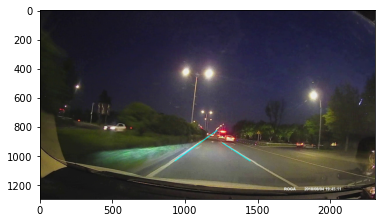

In [73]:
img_line = img.copy()
img_line = cv2.line(img_line,lanes[0][:2],lanes[0][2:],(0,255,255),4)
img_line = cv2.line(img_line,lanes[1][:2],lanes[1][2:],(0,255,255),4)
print(img.shape)
plt.imshow(img_line)

In [74]:
None==None==None

True

In [75]:
p1_slope,p1_b = get_line_slope(lane_points[0],lane_points[1])
p2_slope,p2_b = get_line_slope(lane_points[2],lane_points[3])

print(lane_points)
print(p1_slope,p1_b,p2_slope,p2_b)

p1_y1,p1_y2 = 0,max_distance
p1_x1,p1_x2 = get_x(p1_y1,p1_slope,p1_b),get_x(p1_y2,p1_slope,p1_b)

if p1_x1==p1_x2==None:
    p1_x1,p1_x2 = lane_points[0][0],lane_points[1][0]

p2_y1,p2_y2 = 0,max_distance
p2_x1,p2_x2 = get_x(p2_y1,p2_slope,p2_b),get_x(p2_y2,p2_slope,p2_b)

if p1_x1==p1_x2==None:
    p1_x1,p1_x2 = lane_points[0][0],lane_points[1][0]

if p2_x1==p2_x2==None:
    p2_x1,p2_x2 = lane_points[2][0],lane_points[3][0]

lane_pos = [
    (p1_x1,p1_y1),
    (p1_x2,p1_y2),
    (p2_x1,p2_y1),
    (p2_x2,p2_y2),
]
lane_pos = [(int(x),int(y)) for x,y in lane_pos]
print(lane_pos)

[(904, 957), (985, 3268), (1374, 123), (1372, 976)]
28.530864197530864 -24834.9012345679 -426.5 586134.0
[(870, 0), (953, 2383), (1374, 0), (1368, 2383)]


(921, 1036)
(921, 518)
(1382, 518)
(1382, 1036)


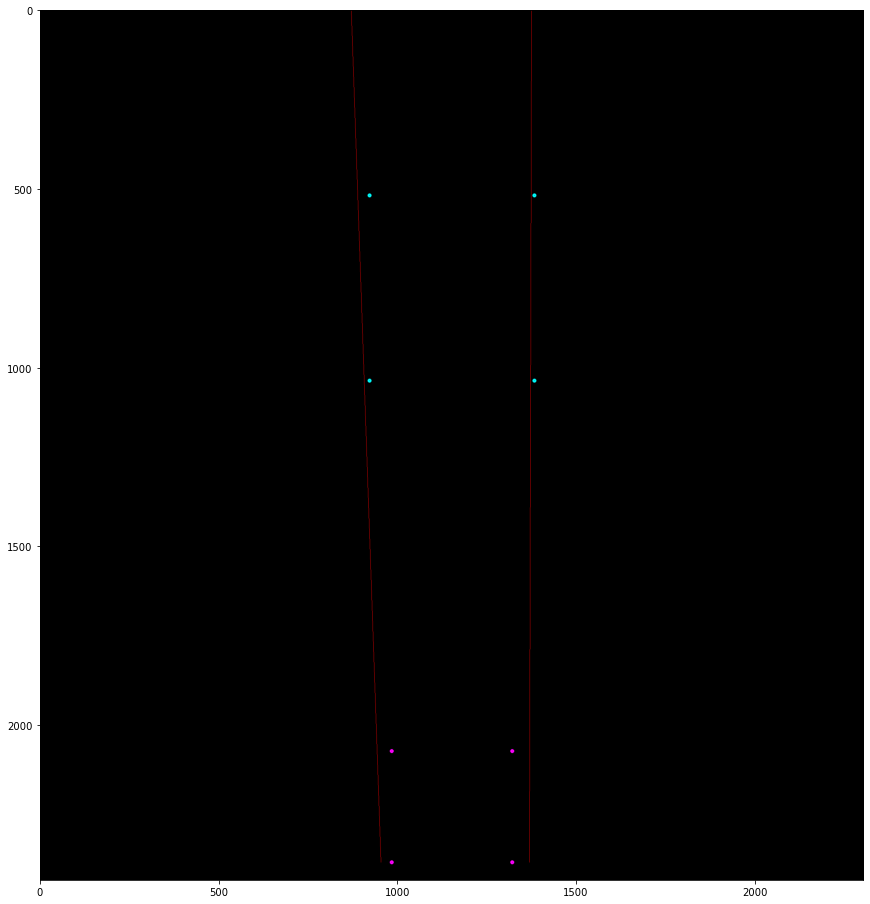

In [76]:
for p in dst_points:
    print(p)
    cv2.circle(img_car_pos,p,3,(0,255,255),3)
for p in car_pos:
    cv2.circle(img_car_pos,p,3,(255,0,255),3)
# cv2.line(img_car_pos,lane_points[0],lane_points[1],(255,0,0))
# cv2.line(img_car_pos,lane_points[2],lane_points[3],(255,0,0))

cv2.line(img_car_pos,lane_pos[0],lane_pos[1],(255,0,0))
cv2.line(img_car_pos,lane_pos[2],lane_pos[3],(255,0,0))

plt.figure(figsize=(16,16))
plt.imshow(img_car_pos)

In [58]:
img_car_pos.shape

(2434, 1296, 3)

In [112]:
# 判断压线
def is_over():
    for x,y in car_pos[:2]: 
        #左侧
        lane_x = get_x(y,p1_slope,p1_b)
        if x<lane_x:
            return True
    for x,y in car_pos[2:]:
        lane_x = get_x(y,p2_slope,p2_b)
        if x>lane_x:
            return True
    return False

In [114]:
is_over()

False

In [116]:
size = (10,20)
points = [
    (5,6),
    (7,8),
    (9,10),
    (11,12),
]

In [118]:
a = np.array(size)

In [119]:
a*points

array([[ 50, 120],
       [ 70, 160],
       [ 90, 200],
       [110, 240]])